# Implementation of Particle Swarm Optimization (PSO) for Test Functions :

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [97]:
class Particle:
    def __init__(self, dim, bounds):
        self.position = np.random.uniform(bounds[:, 0], bounds[:, 1], dim)
        self.velocity = np.random.uniform(-0.1, 0.1, dim)
        self.best_position = self.position.copy()
        self.best_score = float('inf')

def update_velocity(particle, global_best_position, w, c1, c2):
    inertia = w * particle.velocity
    cognitive = c1 * np.random.rand() * (particle.best_position - particle.position)
    social = c2 * np.random.rand() * (global_best_position - particle.position)
    return inertia + cognitive + social

def particle_swarm_optimization(objective_function, bounds, n_particles=50, n_iterations=100, w=0.5, c1=1.5, c2=2):
    """-> The 'bounds' variable specifies the search space bounds for each dimension."""
    dim = len(bounds)
    bounds = np.array(bounds)
    global_best_position = None
    global_best_score = float('inf')
    particles = [Particle(dim, bounds) for _ in range(n_particles)]
    score_hist1 = []
    score_hist2 = []

    for _ in range(n_iterations):
        for particle in particles:
            score = objective_function(particle.position)
            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position.copy()
            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position.copy()

        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position, w, c1, c2)
            particle.position += particle.velocity
            # Check bounds
            particle.position = np.clip(particle.position, bounds[:, 0], bounds[:, 1])
            
        score_hist1.append(global_best_score)
        score_hist2.append(global_best_position)

    return global_best_position, global_best_score, score_hist1, score_hist2


In [95]:
def show_plot(x, y, title="", x_label= "", y_label="") :
    plt.figure(figsize=(7, 4))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [79]:
def rosenbrock_function(x):
    a = 1
    b = 100
    return sum(b * (x[1:] - x[:-1]**2)**2 + (a - x[:-1])**2)

def bent_cigar_function(x):
    if isinstance(x, list):
        x = np.array(x)
    return x[0]**2 + 1e6 * np.sum(x[1:]**2)

def discus_function(x):
    if isinstance(x, list):
        x = np.array(x)
    return 1e6 * x[0]**2 + np.sum(x[1:]**2)

def rastrigin_function(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

Best position: [0.99999916 0.99999823]
Best score: 1.3037509574486872e-12


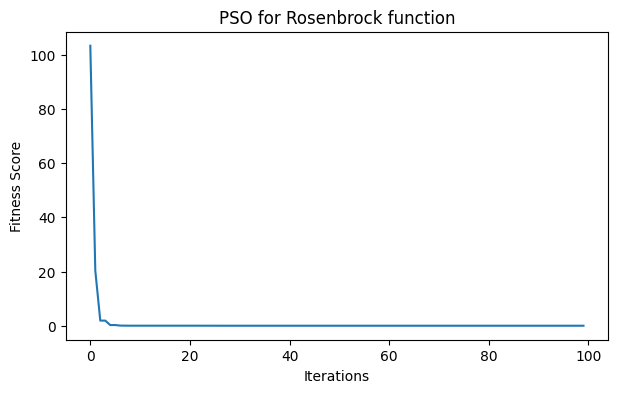

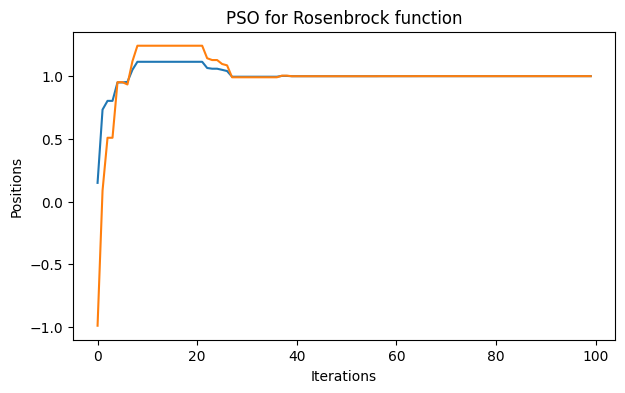

In [99]:
# Example usage for rosenbrock_function
bounds = [(-10, 10), (-10, 10)]  # Example bounds for 2D optimization
best_position, best_score, hist1, hist2 = particle_swarm_optimization(rosenbrock_function, bounds, n_particles=50, n_iterations=100, w=0.6, c1=0.6, c2=3)
print("Best position:", best_position)
print("Best score:", best_score)

show_plot(list(range(100)), hist1, "PSO for Rosenbrock function", "Iterations", "Fitness Score")
show_plot(list(range(100)), hist2, "PSO for Rosenbrock function", "Iterations", "Positions")

Best position: [-3.14500747e-09  2.76223851e-13]
Best score: 9.967371617211083e-18


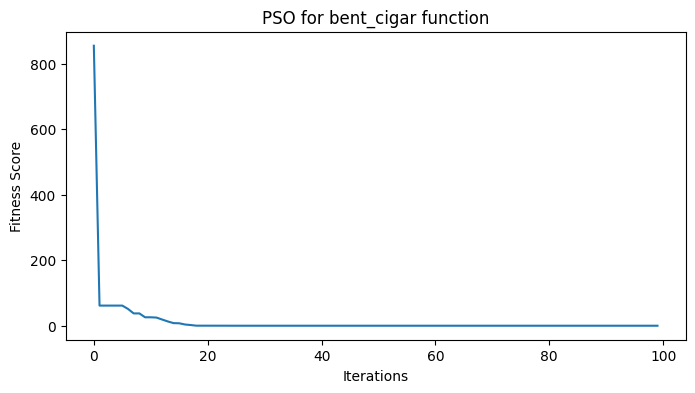

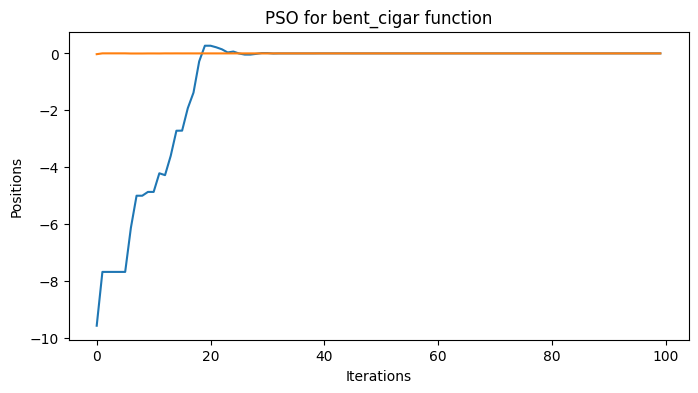

In [87]:
# Example usage for rosenbrock_function
bounds = [(-10, 10), (-10, 10)]  # Example bounds for 2D optimization
best_position, best_score, hist1, hist2 = particle_swarm_optimization(bent_cigar_function, bounds)
print("Best position:", best_position)
print("Best score:", best_score)

show_plot(list(range(100)), hist1, "PSO for bent_cigar function", "Iterations", "Fitness Score")
show_plot(list(range(100)), hist2, "PSO for bent_cigar function", "Iterations", "Positions")

Best position: [ 3.33177540e-11 -5.06502717e-09]
Best score: 1.1357272318624003e-15


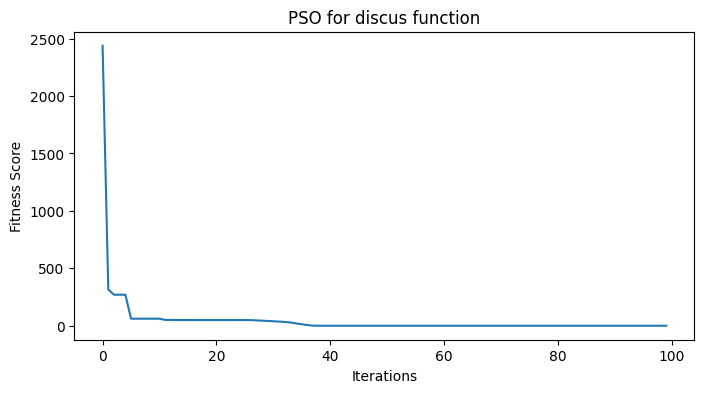

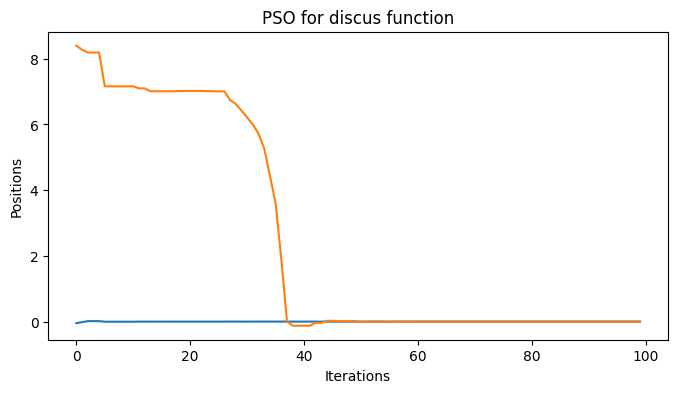

In [88]:
# Example usage for rosenbrock_function
bounds = [(-10, 10), (-10, 10)]  # Example bounds for 2D optimization
best_position, best_score, hist1, hist2 = particle_swarm_optimization(discus_function, bounds)
print("Best position:", best_position)
print("Best score:", best_score)

show_plot(list(range(100)), hist1, "PSO for discus function", "Iterations", "Fitness Score")
show_plot(list(range(100)), hist2, "PSO for discus function", "Iterations", "Positions")

Best position: [ 6.30445006e-10 -2.70722571e-09]
Best score: 0.0


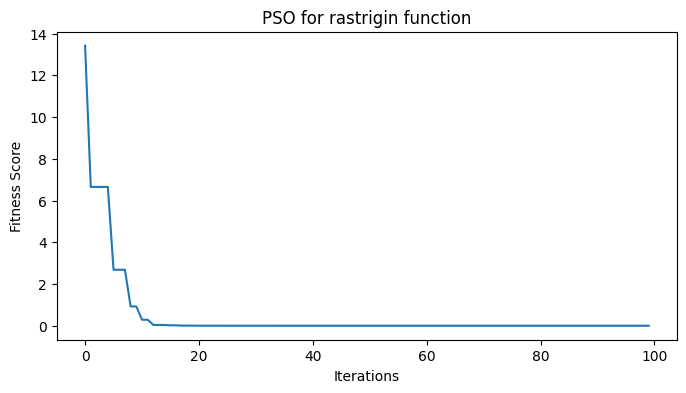

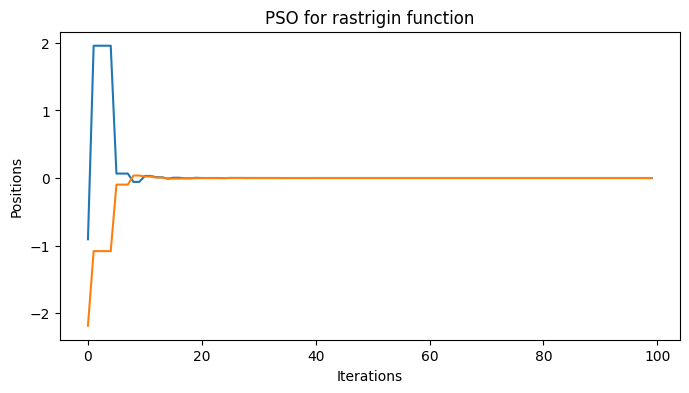

In [89]:
# Example usage for rosenbrock_function
bounds = [(-10, 10), (-10, 10)]  # Example bounds for 2D optimization
best_position, best_score, hist1, hist2 = particle_swarm_optimization(rastrigin_function, bounds)
print("Best position:", best_position)
print("Best score:", best_score)

show_plot(list(range(100)), hist1, "PSO for rastrigin function", "Iterations", "Fitness Score")
show_plot(list(range(100)), hist2, "PSO for rastrigin function", "Iterations", "Positions")

## PSO for TSP :

In [90]:
class Particle:
    def __init__(self, num_cities):
        self.position = np.random.permutation(num_cities)
        self.velocity = np.zeros((num_cities, num_cities))
        self.best_position = self.position.copy()
        self.best_score = float('inf')

def update_velocity(particle, global_best_position, w, c1, c2):
    inertia = w * particle.velocity
    cognitive = c1 * np.random.rand() * (particle.best_position - particle.position)
    social = c2 * np.random.rand() * (global_best_position - particle.position)
    return inertia + cognitive + social

def apply_velocity(position, velocity):
    for i in range(len(position)):
        swap_prob = np.random.rand(len(position))
        swap_indices = np.where(velocity[i] > swap_prob)[0]
        if len(swap_indices) > 0:
            swap_with = np.random.choice(swap_indices)
            position[i], position[swap_with] = position[swap_with], position[i]
    return position

def particle_swarm_optimization(objective_function, num_cities=8, n_particles=50, n_iterations=100, w=0.5, c1=1.5, c2=2.0):
    global_best_position = None
    global_best_score = float('inf')
    particles = [Particle(num_cities) for _ in range(n_particles)]
    score_hist = []

    for _ in range(n_iterations):
        for particle in particles:
            score = objective_function(particle.position)
            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position.copy()
            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position.copy()

        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position, w, c1, c2)
            particle.position = apply_velocity(particle.position, particle.velocity)

        score_hist.append(global_best_score)

    return global_best_position, global_best_score, score_hist


Best tour found: ['H', 'A', 'B', 'C', 'D', 'L', 'K', 'E', 'F', 'I', 'J', 'G']
Distance of the best tour: 34.0


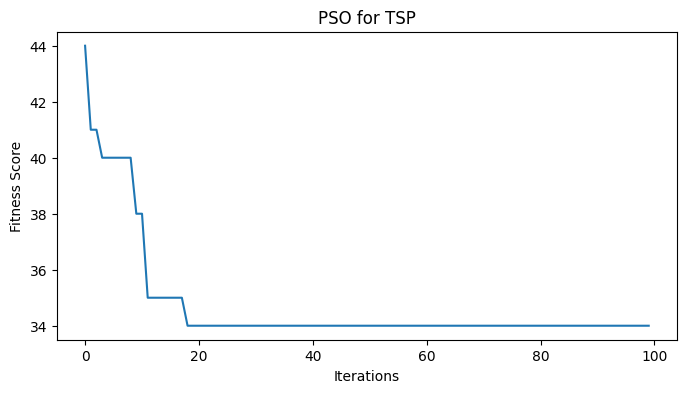

In [93]:
# Example usage
cities = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]

distance_matrix = {
    "A": {"A": 0, "B": 2, "C": 3, "D": 1, "E": 5, "F": 8, "G": 7, "H": 3, "I": 4, "J": 6, "K": 5, "L": 9},
    "B": {"A": 2, "B": 0, "C": 2, "D": 4, "E": 6, "F": 3, "G": 5, "H": 7, "I": 3, "J": 5, "K": 8, "L": 6},
    "C": {"A": 3, "B": 2, "C": 0, "D": 3, "E": 4, "F": 6, "G": 8, "H": 2, "I": 5, "J": 7, "K": 6, "L": 4},
    "D": {"A": 1, "B": 4, "C": 3, "D": 0, "E": 2, "F": 7, "G": 6, "H": 4, "I": 8, "J": 6, "K": 3, "L": 5},
    "E": {"A": 5, "B": 6, "C": 4, "D": 2, "E": 0, "F": 1, "G": 3, "H": 6, "I": 7, "J": 5, "K": 4, "L": 8},
    "F": {"A": 8, "B": 3, "C": 6, "D": 7, "E": 1, "F": 0, "G": 2, "H": 5, "I": 4, "J": 8, "K": 7, "L": 6},
    "G": {"A": 7, "B": 5, "C": 8, "D": 6, "E": 3, "F": 2, "G": 0, "H": 4, "I": 6, "J": 3, "K": 5, "L": 7},
    "H": {"A": 3, "B": 7, "C": 2, "D": 4, "E": 6, "F": 5, "G": 4, "H": 0, "I": 8, "J": 2, "K": 7, "L": 3},
    "I": {"A": 4, "B": 3, "C": 5, "D": 8, "E": 7, "F": 4, "G": 6, "H": 8, "I": 0, "J": 1, "K": 2, "L": 5},
    "J": {"A": 6, "B": 5, "C": 7, "D": 6, "E": 5, "F": 8, "G": 3, "H": 2, "I": 1, "J": 0, "K": 4, "L": 6},
    "K": {"A": 5, "B": 8, "C": 6, "D": 3, "E": 4, "F": 7, "G": 5, "H": 7, "I": 2, "J": 4, "K": 0, "L": 2},
    "L": {"A": 9, "B": 6, "C": 4, "D": 5, "E": 8, "F": 6, "G": 7, "H": 3, "I": 5, "J": 6, "K": 2, "L": 0}
}

def calculate_tour_length(cities_order):
    total_distance = 0.0
    num_cities = len(cities_order)
    for i in range(num_cities):
        j = (i + 1) % num_cities
        city_i = cities_order[i]
        city_j = cities_order[j]
        total_distance += distance_matrix[city_i][city_j]
    return total_distance

def objective_function(position):
    city_order = [cities[idx] for idx in position]
    return calculate_tour_length(city_order)

# Run PSO for TSP
best_tour_indices, best_distance, score_hist = particle_swarm_optimization(objective_function, num_cities=len(cities))

# Convert best_tour_indices to city names
best_tour = [cities[idx] for idx in best_tour_indices]

print(f"Best tour found: {best_tour}")
print(f"Distance of the best tour: {best_distance}")

show_plot(list(range(100)), score_hist, "PSO for TSP", "Iterations", "Fitness Score")

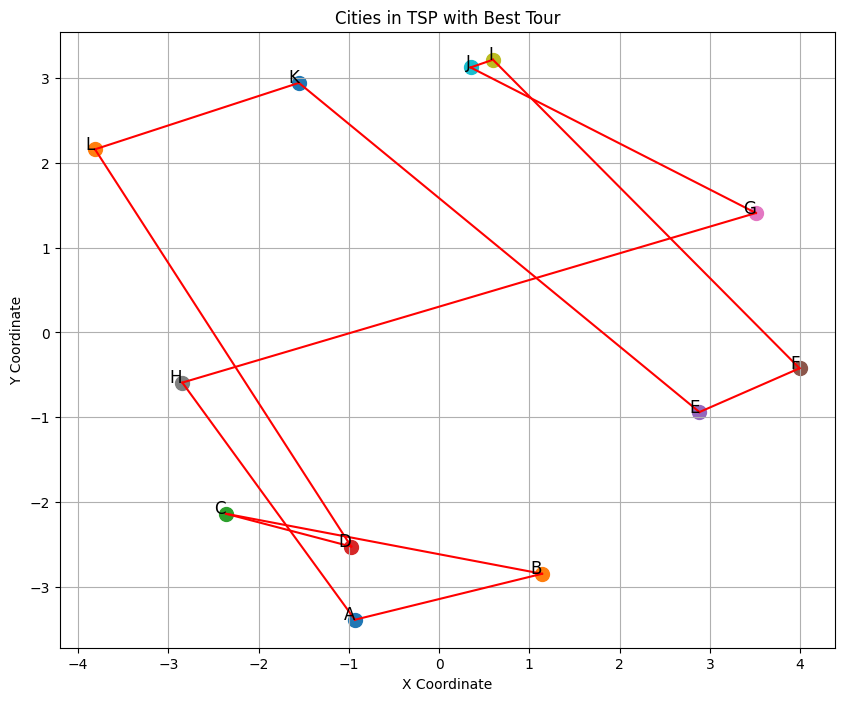

In [94]:
# Convert the distance matrix to a 2D numpy array
distance_array = np.array([[distance_matrix[city1][city2] for city2 in cities] for city1 in cities])

# Use MDS to convert distances to 2D coordinates
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
positions = mds.fit_transform(distance_array)

# Plot the cities
plt.figure(figsize=(10, 8))
for i, city in enumerate(cities):
    x, y = positions[i]
    plt.scatter(x, y, s=100)  # Plot the city
    plt.text(x, y, city, fontsize=12, ha='right')  # Label the city

# Plot the best tour path
for i in range(len(best_tour) - 1):
    city1_idx = cities.index(best_tour[i])
    city2_idx = cities.index(best_tour[i + 1])
    x1, y1 = positions[city1_idx]
    x2, y2 = positions[city2_idx]
    plt.plot([x1, x2], [y1, y2], 'r-')  # Plot the tour path

# Connect the last city back to the first city
city1_idx = cities.index(best_tour[-1])
city2_idx = cities.index(best_tour[0])
x1, y1 = positions[city1_idx]
x2, y2 = positions[city2_idx]
plt.plot([x1, x2], [y1, y2], 'r-')  # Plot the tour path

plt.title('Cities in TSP with Best Tour')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()